Before executing this file, please execute the fine tuning process as follows:

- Run `fine_tuner` from repo root

```bash
python -m fine_tune_frontier.fine_tuner
```

- Copy the fine tuned model name from the script output or logs (`fine_tune_frontier_logs.log`)
- Paste the fine tuned model name in the following code block to set `FINE_TUNED_MODEL` variable

In [6]:
FINE_TUNED_MODEL = "ft:gpt-4.1-nano-2025-04-14:personal::D895J4EM"

In [7]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

In [8]:
from evaluator.tester import Tester, train_ds, val_ds, test_ds

In [9]:
import re
from models.item import Item
from common.constants import OPENAI_API_KEY
from openai import OpenAI
from typing import List

openai_client = OpenAI(api_key=OPENAI_API_KEY)


def get_messages(item: Item) -> List[dict]:
    messages = [
        {
            "role": "user",
            "content": f"Estimate the price of this product:\n{item.summary}",
        }
    ]
    return messages


def fine_tuned_frontier_llm(item: Item) -> float:
    messages = get_messages(item)
    response = openai_client.chat.completions.create(
        model=FINE_TUNED_MODEL,
        messages=messages,
    )
    estimated_price = response.choices[0].message.content
    estimated_price = re.sub(r"[^0-9.]", "", estimated_price)
    try:
        estimated_price = float(estimated_price)
    except Exception as err:
        print(f"Error: {err}")
        return 0
    return estimated_price

Error: could not convert string to float: '3070.1414..0.50.38.507014.'
1: Guess: $0.00 Truth: $35.00 Error: $35.00 SLE: 12.84 Item: Small Soar Dove Bird Necklace, Delicate ...
Error: could not convert string to float: '25.99.99.25255075100..2550100.25100.2550.'
2: Guess: $0.00 Truth: $25.00 Error: $25.00 SLE: 10.62 Item: Omaha Steaks Gift Card
Error: could not convert string to float: '2021.150250.180220.'
3: Guess: $0.00 Truth: $285.00 Error: $285.00 SLE: 31.99 Item: Ohana Baritone Ukulele Model BK-20CE
4: Guess: $112,035.00 Truth: $4.88 Error: $112,030.12 SLE: 97.12 Item: BodyGuardz - Pure 2 Edge Glass Screen Pr...
Error: could not convert string to float: '1510..'
5: Guess: $0.00 Truth: $5.00 Error: $5.00 SLE: 3.21 Item: Numer 1 Dad Iron On Decal, Father's Day ...
Error: could not convert string to float: '.815.1012.'
6: Guess: $0.00 Truth: $16.99 Error: $16.99 SLE: 8.35 Item: I Love My Maltese Rhinestone Iron on Tra...
Error: could not convert string to float: '842535.2535507010014

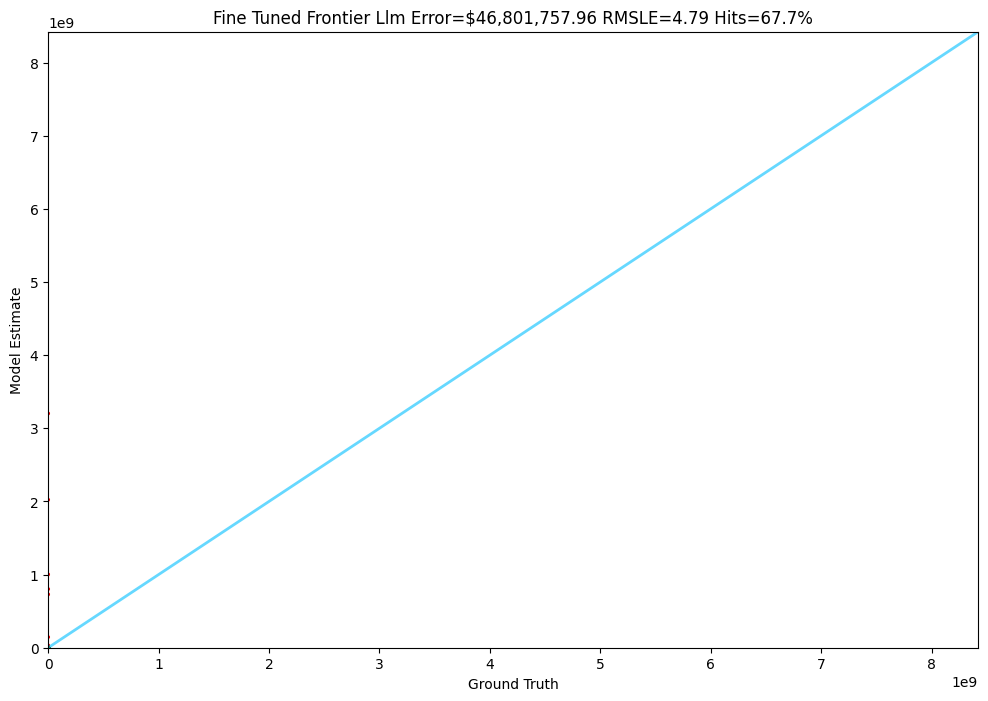

In [11]:
Tester.test(fine_tuned_frontier_llm)